In [4]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os

testing and plotting an overview

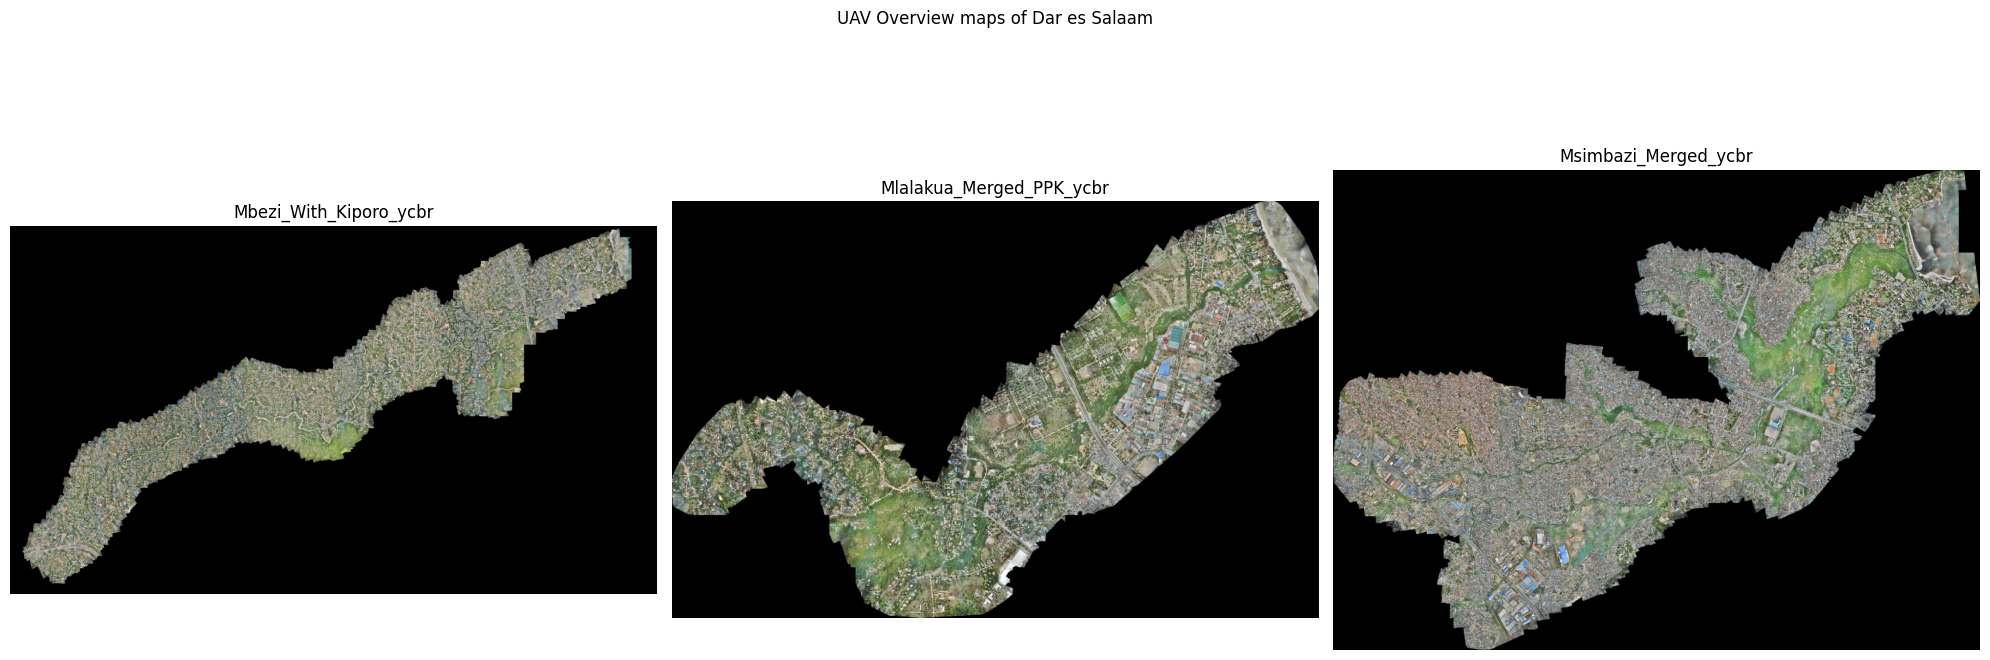

In [ ]:

# path to raw input
data_folder = "../data/raw/"

# list of tif files
tif_files = [
    "Mbezi_With_Kiporo_ycbr.tif",
    "Mlalakua_Merged_PPK_ycbr.tif",
    "Msimbazi_Merged_ycbr.tif"
]

# Optional: downsmapling because dataset too large
# QGIS better for overview
scale_factor = 0.01  

# create figure
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for ax, tif_file in zip(axes, tif_files):
    path = os.path.join(data_folder, tif_file)
    
    with rasterio.open(path) as src:
        # Downsampling for overview
        overview = src.read(
            out_shape=(
                src.count,
                int(src.height * scale_factor),
                int(src.width * scale_factor)
            )
        )
        
        # Rasterio: (B,H,W) -> matplotlib: (H,W,C)
        if src.count >= 3:
            rgb = overview[:3].transpose((1, 2, 0))
            ax.imshow(rgb)
        else:
            ax.imshow(overview[0], cmap="Greens")
        
        ax.set_title(tif_file.replace(".tif", ""))
        ax.axis('off')

plt.suptitle("UAV Overview maps of Dar es Salaam")
plt.tight_layout()
plt.show()

In [23]:
for tif_file in tif_files:
    path = os.path.join(data_folder, tif_file)
    
    print(f"\n=== Metadata for {tif_file} ===")
    
    with rasterio.open(path) as src:
        print("File:", src.name)
        print("Width, Height:", src.width, src.height)
        print("Number of bands:", src.count)
        print("CRS:", src.crs)
        print("Transform (origin, pixel size):")
        print(src.transform)
        print("Data type:", src.dtypes)
        
        # Loop through bands and read downsampled version
        for i in range(1, src.count + 1):
            band = src.read(
                i,
                out_shape=(
                    1,  # single band
                    int(src.height * scale_factor),
                    int(src.width * scale_factor)
                )
            )
            print(f"Band {i} - min: {band.min()}, max: {band.max()}")


=== Metadata for Mbezi_With_Kiporo_ycbr.tif ===
File: ../data/raw/Mbezi_With_Kiporo_ycbr.tif
Width, Height: 270590 154287
Number of bands: 3
CRS: EPSG:32737
Transform (origin, pixel size):
| 0.05, 0.00, 512218.85|
| 0.00,-0.05, 9257495.75|
| 0.00, 0.00, 1.00|
Data type: ('uint8', 'uint8', 'uint8')
Band 1 - min: 0, max: 255
Band 2 - min: 0, max: 255
Band 3 - min: 0, max: 255

=== Metadata for Mlalakua_Merged_PPK_ycbr.tif ===
File: ../data/raw/Mlalakua_Merged_PPK_ycbr.tif
Width, Height: 123418 79621
Number of bands: 3
CRS: EPSG:32737
Transform (origin, pixel size):
| 0.05, 0.00, 520952.54|
| 0.00,-0.05, 9254896.81|
| 0.00, 0.00, 1.00|
Data type: ('uint8', 'uint8', 'uint8')
Band 1 - min: 0, max: 255
Band 2 - min: 0, max: 255
Band 3 - min: 0, max: 255

=== Metadata for Msimbazi_Merged_ycbr.tif ===
File: ../data/raw/Msimbazi_Merged_ycbr.tif
Width, Height: 155040 115190
Number of bands: 3
CRS: EPSG:32737
Transform (origin, pixel size):
| 0.05, 0.00, 524060.40|
| 0.00,-0.05, 9250017.53|
| 0.